# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
# %pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print("Shape (rows, columns)")
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

Shape (rows, columns)
(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print("Column Names")
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Column Names
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print("NaN Values")
print(df_hh_income.isna().any())
print(df_pct_poverty.isna().any())
print(df_pct_completed_hs.isna().any())
print(df_share_race_city.isna().any())
print(df_fatalities.isna().any())

NaN Values
Geographic Area    False
City               False
Median Income       True
dtype: bool
Geographic Area    False
City               False
poverty_rate       False
dtype: bool
Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool
Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool
id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool


In [8]:
print("Duplicated Values")
print(df_hh_income.duplicated().any())
print(df_pct_poverty.duplicated().any())
print(df_pct_completed_hs.duplicated().any())
print(df_share_race_city.duplicated().any())
print(df_fatalities.duplicated().any())

Duplicated Values
False
False
False
False
False


In [9]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
df_hh_income['Median Income'].fillna(value=0, inplace=True)
df_fatalities['age'].fillna(value=0, inplace=True)

C:\Users\eric-\AppData\Local\Temp\ipykernel_12948\2083916778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hh_income['Median Income'].fillna(value=0, inplace=True)
C:\Users\eric-\AppData\Local\Temp\ipykernel_12948\2083916778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [11]:
# Combine first 4 dataframes to one
df_city_data = df_hh_income.merge(right=df_pct_poverty, on=['Geographic Area', 'City'])
df_city_data = df_city_data.merge(right=df_pct_completed_hs, on=['Geographic Area', 'City'])
df_share_race_city.rename(columns={'Geographic area': 'Geographic Area'}, inplace=True)
df_city_data = df_city_data.merge(right=df_share_race_city, on=['Geographic Area', 'City'])

# Replace some non numeral values
share_races = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

df_city_data['Median Income'] = df_city_data['Median Income'].replace('(X)', 0).replace('-', 0, regex=True).replace('\d(-|\+)', '', regex=True).replace(',', '.').str.replace(',', '.', regex=False)
df_city_data['poverty_rate'] = df_city_data['poverty_rate'].replace('-', 0, regex=True).replace('\d(-|\+)', '', regex=True).replace(',', '.').str.replace(',', '.', regex=False)
df_city_data['percent_completed_hs'] = df_city_data['percent_completed_hs'].replace('-', 0, regex=True).replace('\d(-|\+)', '', regex=True).replace(',', '.').str.replace(',', '.', regex=False)
df_city_data[share_races] = df_city_data[share_races].replace('(X)', 0)

# Add long name for the shortened states
df_city_data['state_long'] = [abbrev_to_us_state[state] for state in df_city_data['Geographic Area']]

# Change types to category and floats
df_city_data = df_city_data.assign(
  # Konvertiere zu category
  state = df_city_data['Geographic Area'].astype('category'),
  City     =     df_city_data['City'].astype('category'),
  # Konvertiere zu Float
  Median_Income   = df_city_data['Median Income'].astype(float), 
  poverty_rate   = df_city_data['poverty_rate'].astype(float), 
  percent_completed_hs   = df_city_data['percent_completed_hs'].astype(float), 
  share_white   = df_city_data['share_white'].astype(float), 
  share_black    = df_city_data['share_black'].astype(float), 
  share_native_american   = df_city_data['share_native_american'].astype(float), 
  share_asian    = df_city_data['share_asian'].astype(float), 
  share_hispanic    = df_city_data['share_hispanic'].astype(float)
)

# Drop unconverted columns
df_city_data.drop(columns=['Geographic Area', 'Median Income'], inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

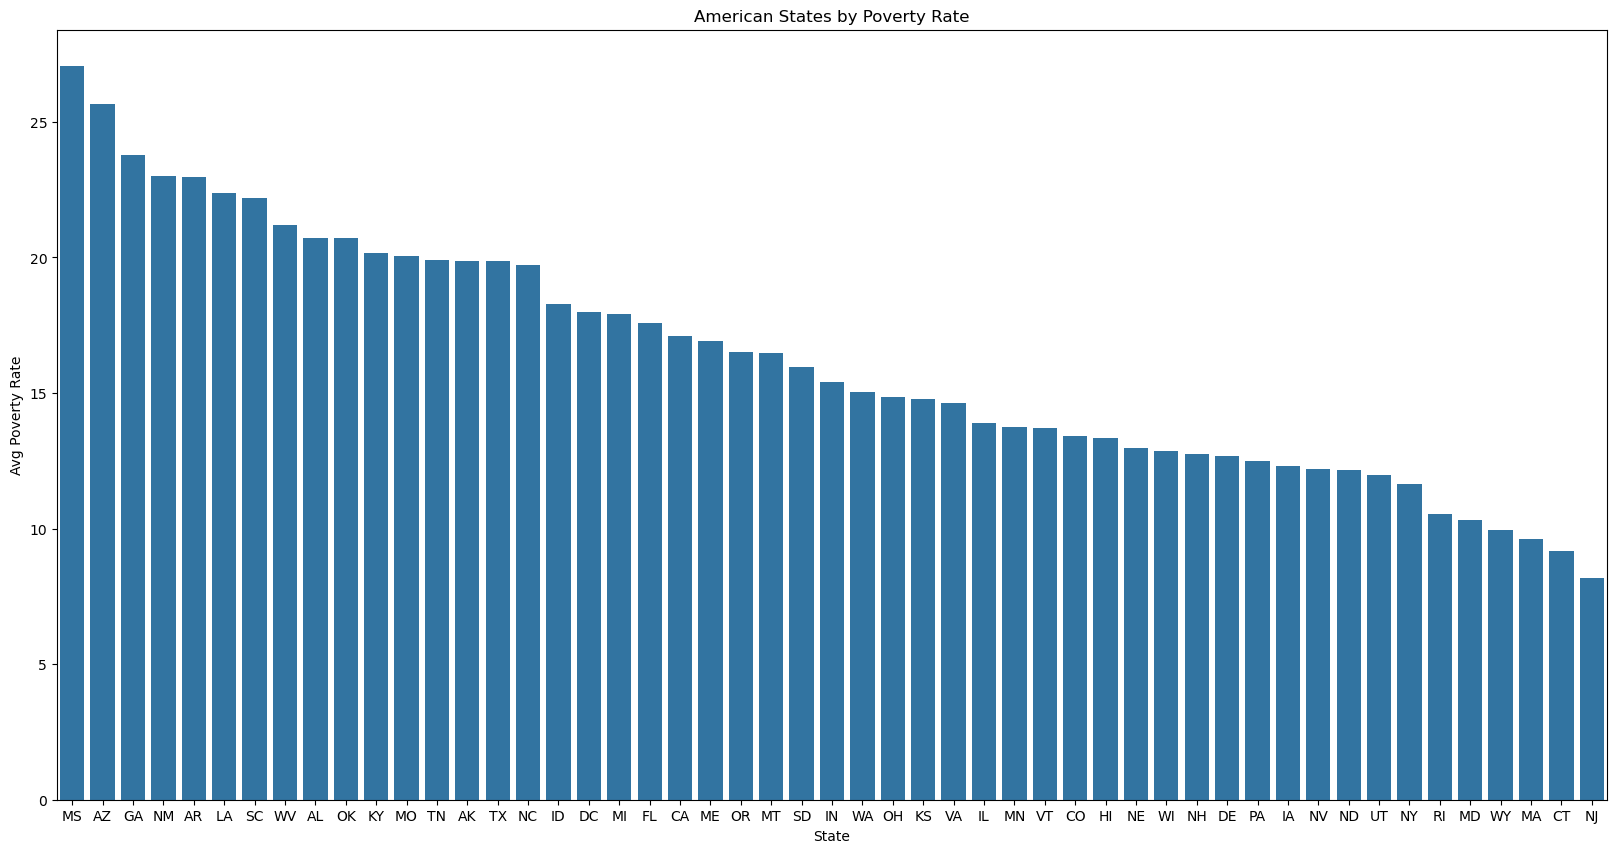

In [12]:
states_poverty = df_city_data.groupby('state', observed=True, as_index=False).agg(poverty =('poverty_rate','mean')).sort_values(by='poverty', ascending=False)
states_poverty.reset_index(inplace=True, drop=True)

plt.figure(figsize=(20, 10))
plt.title('American States by Poverty Rate')
sns.barplot(
  data=states_poverty,
  x='state', 
  y='poverty',
  order=states_poverty['state']
)

plt.ylabel('Avg Poverty Rate')
plt.xlabel('State')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

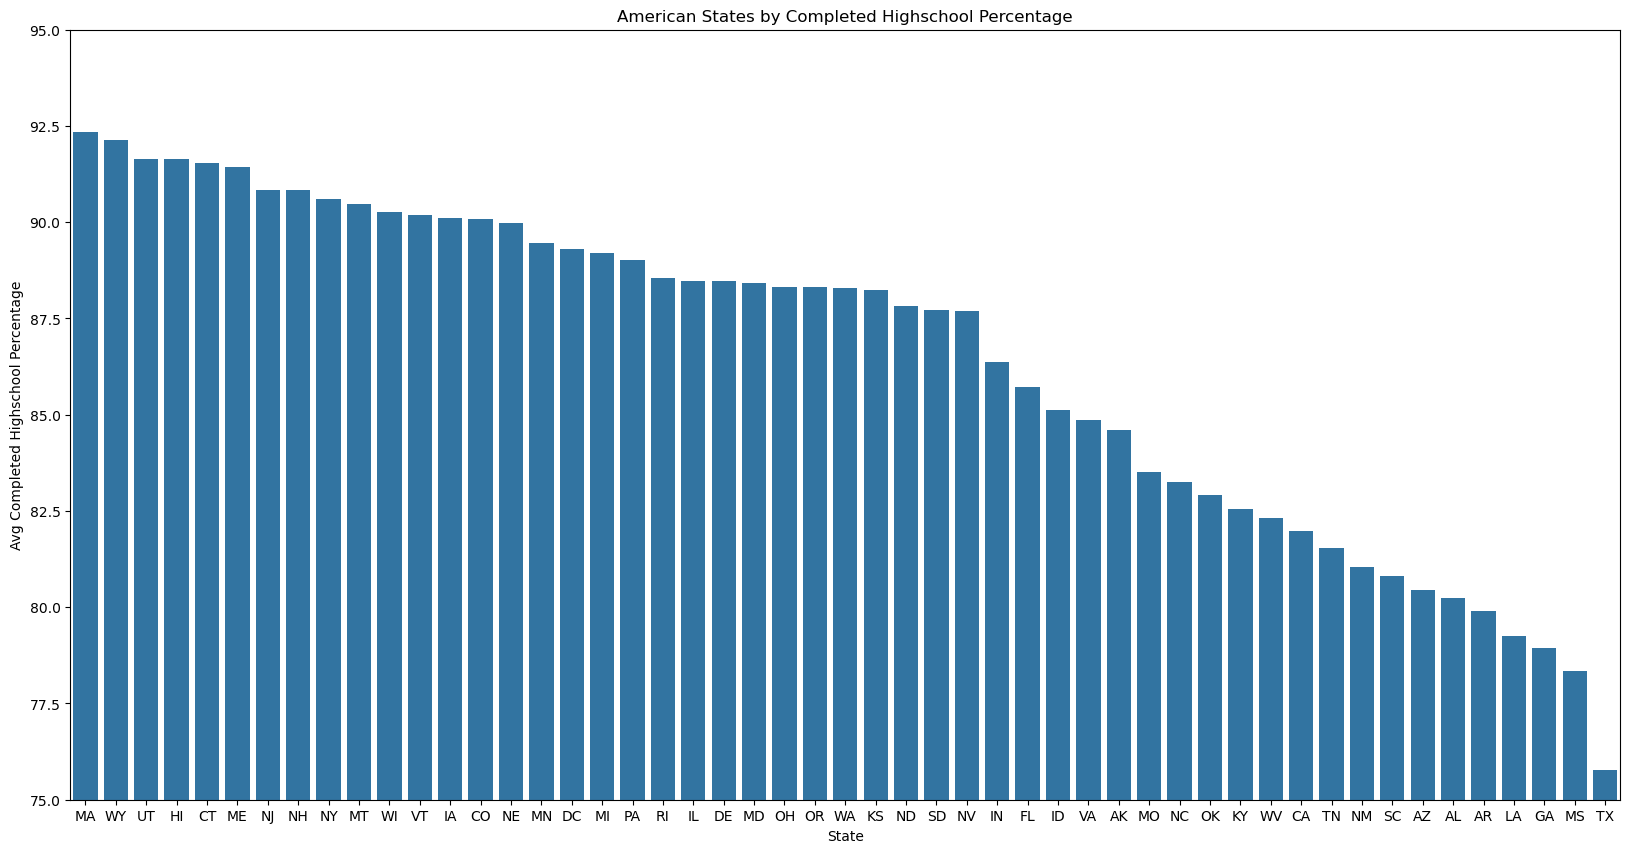

In [13]:
states_hs = df_city_data.groupby('state', observed=True, as_index=False).agg(graduates =('percent_completed_hs','mean')).sort_values(by='graduates', ascending=False)
states_hs.reset_index(inplace=True, drop=True)

plt.figure(figsize=(20, 10))
plt.title('American States by Completed Highschool Percentage')
sns.barplot(
  data=states_hs,
  x='state', 
  y='graduates',
  order=states_hs['state']
)

plt.ylim(75, 95)
plt.ylabel('Avg Completed Highschool Percentage')
plt.xlabel('State')
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

(75.0, 95.0)

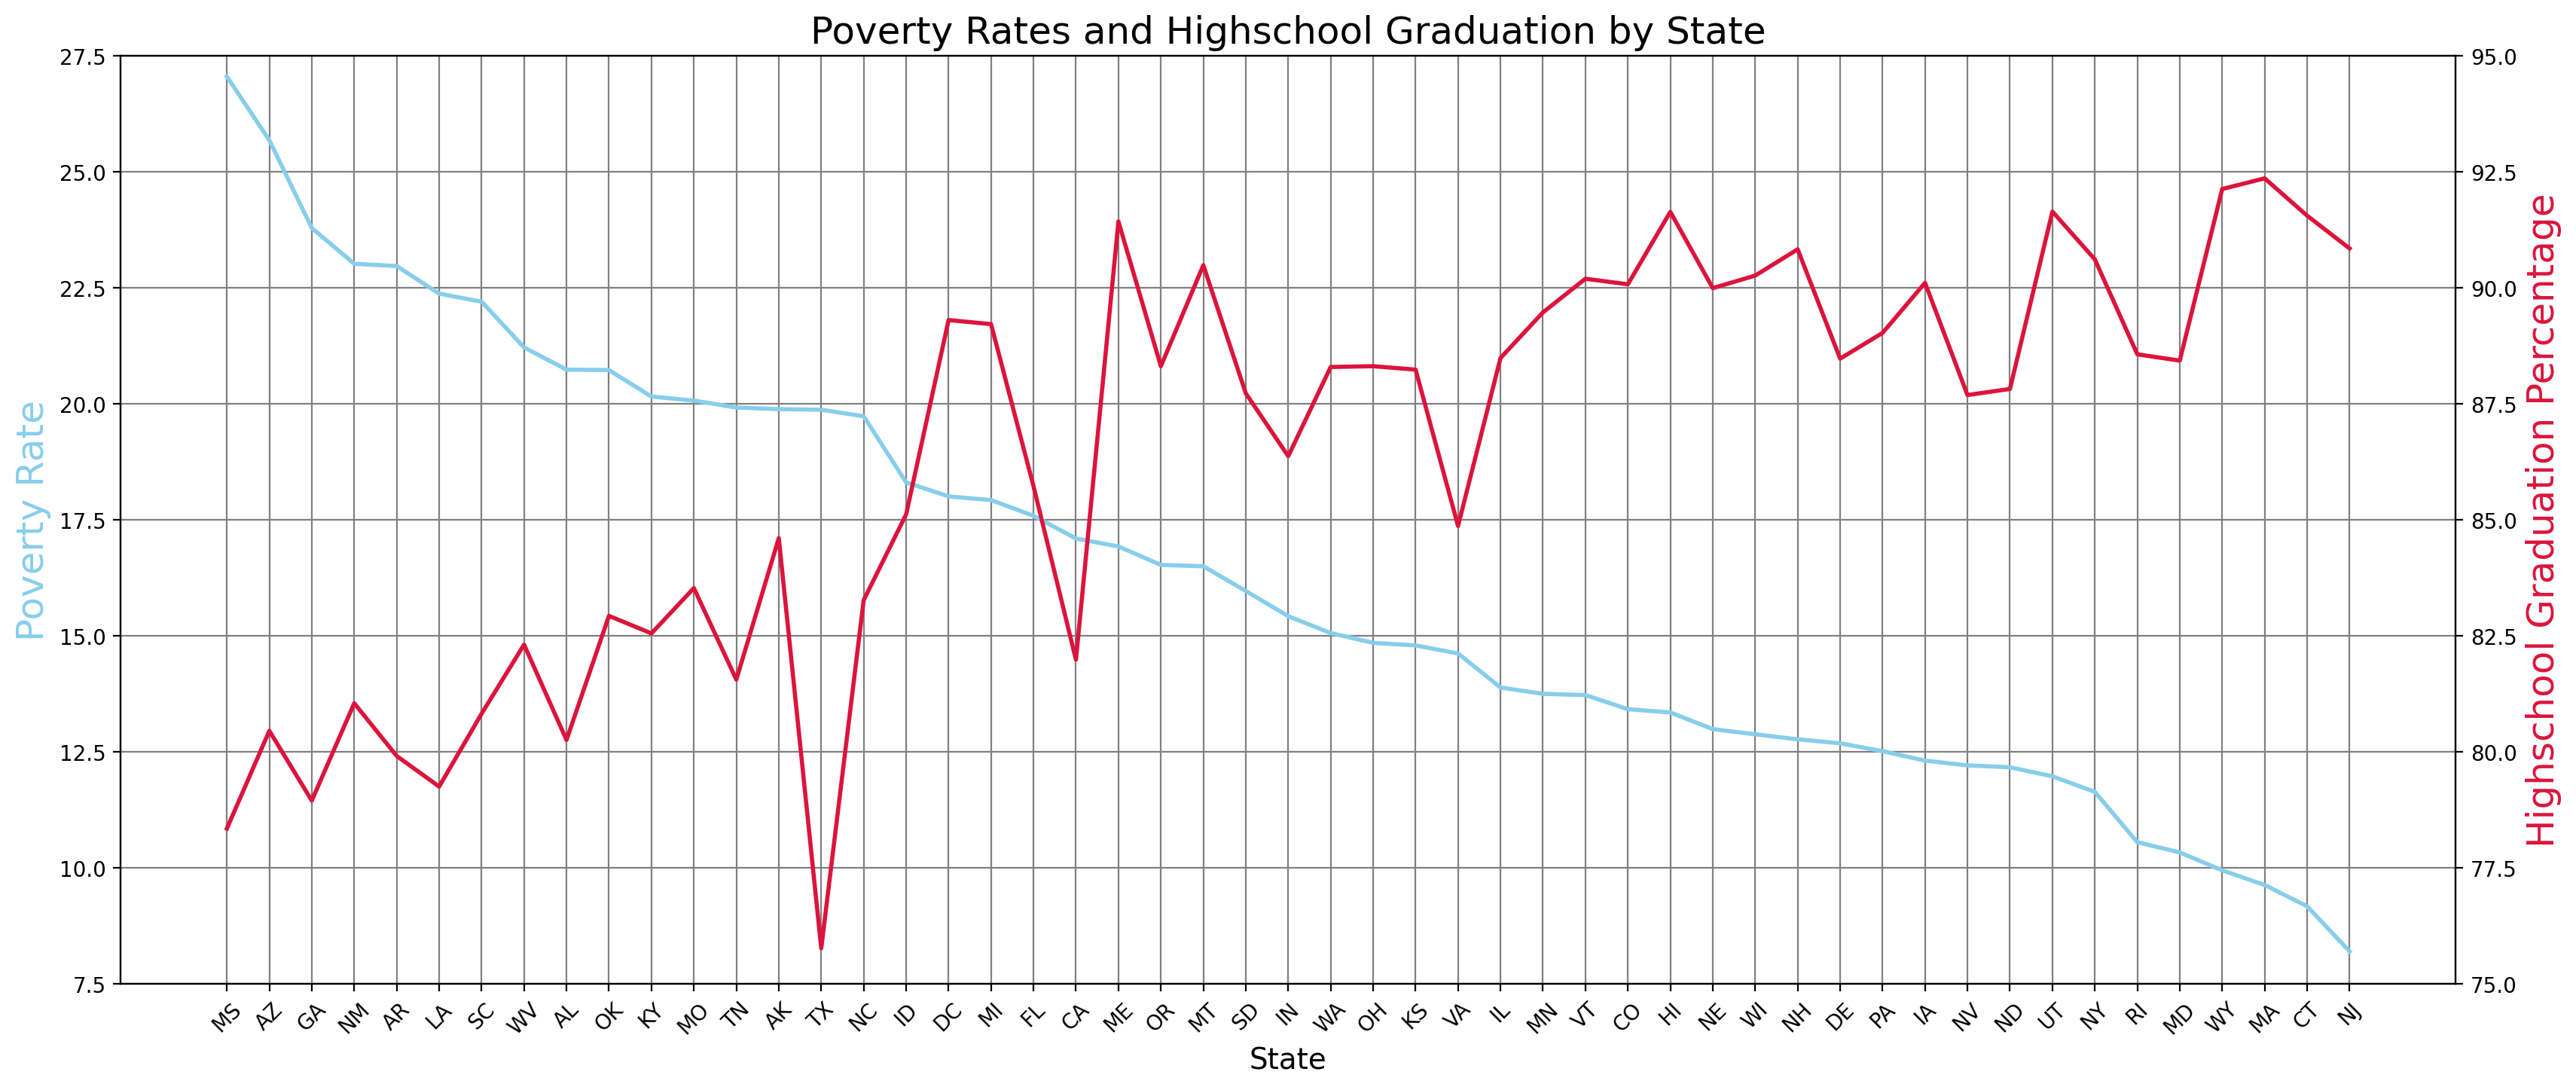

In [14]:
# merge df together
df_pov_hs = states_poverty.merge(right=states_hs, on='state')

plt.figure(figsize=(20,8), dpi=200)
plt.title('Poverty Rates and Highschool Graduation by State', fontsize=18)

# Ticks
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # twinx() makes both axes share the same x-axis

ax1.set_ylabel('Poverty Rate', color='skyblue', fontsize=18)
ax2.set_ylabel('Highschool Graduation Percentage', color='crimson', fontsize=18)
ax1.set_xlabel('State', fontsize=14)

# format grid
ax1.grid(color='grey')

ax1.plot(df_pov_hs.state, df_pov_hs.poverty, color="skyblue", linewidth=2)
ax2.plot(df_pov_hs.state, df_pov_hs.graduates, color="crimson", linewidth=2)

ax1.set_ylim(7.5, 27.5)
ax2.set_ylim(75, 95)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

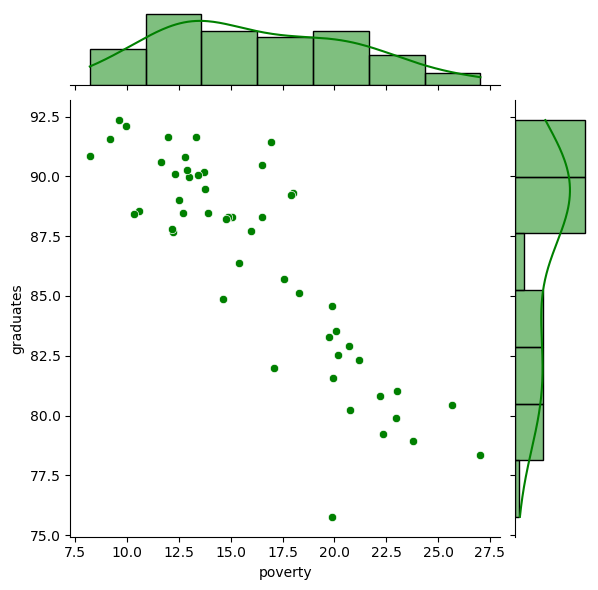

In [15]:
sns.jointplot(data=df_pov_hs, 
              x='poverty', 
              y='graduates', 
              kind='scatter', 
              marginal_kws={'kde': True},
              color='green')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<function matplotlib.pyplot.show(close=None, block=None)>

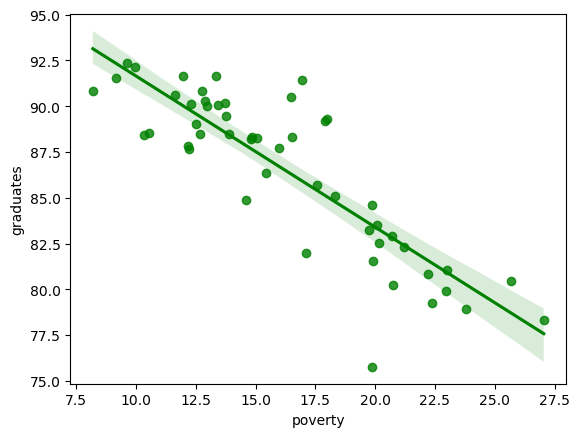

In [16]:
sns.regplot(data=df_pov_hs,
           x='poverty',
           y='graduates',
           color='green')
plt.show

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. B

In [17]:

# Change types to category and floats
df_fatalities = df_fatalities.assign(
  # Konvertiere zu category
    manner_of_death = df_fatalities['manner_of_death'].astype('category'),
    armed = df_fatalities['armed'].astype('category'),
    gender = df_fatalities['gender'].astype('category'),
    race = df_fatalities['race'].astype('category'),
    state = df_fatalities['state'].astype('category'),
    signs_of_mental_illness = df_fatalities['signs_of_mental_illness'].astype('category'),
    threat_level = df_fatalities['threat_level'].astype('category'),
    flee = df_fatalities['flee'].astype('category'),
    body_camera = df_fatalities['body_camera'].astype('category'),
  # Konvertiere zu Float
    age   = df_fatalities['age'].astype(float), 
)

# Convert to datetime
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Rename Races
new_categories = {'W':'White', 'B':'Black','A':'Asian','H':'Hispanic','N':'Native American','O':'Unknown'}
df_fatalities['race'] = df_fatalities['race'].cat.rename_categories(new_categories)


C:\Users\eric-\AppData\Local\Temp\ipykernel_12948\1341150376.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])


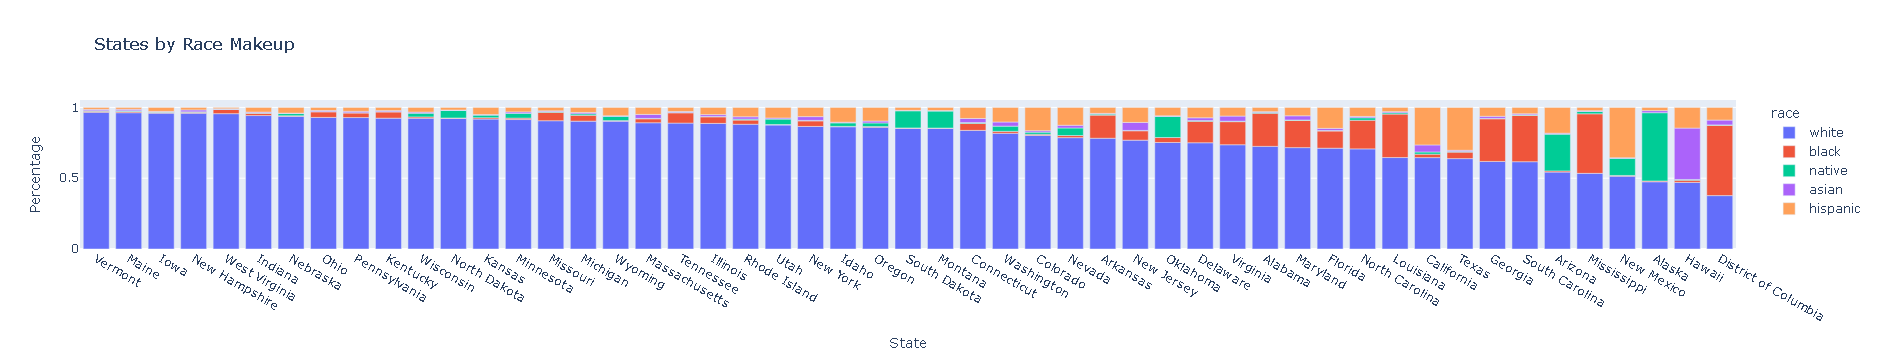

In [18]:
racial_makeup = df_city_data.groupby('state_long', observed=True).agg(white = ('share_white', 'sum'),
                                                 black = ('share_black', 'sum'),
                                                 native = ('share_native_american', 'sum'),
                                                 asian = ('share_asian', 'sum'),
                                                 hispanic = ('share_hispanic', 'sum'))

# Calculate fitting percentage of races
racial_makeup['sum'] = racial_makeup['white'] + racial_makeup['black'] + racial_makeup['native'] + racial_makeup['asian'] + racial_makeup['hispanic']
racial_makeup['white'] = racial_makeup['white'] / racial_makeup['sum']
racial_makeup['black'] = racial_makeup['black'] / racial_makeup['sum']
racial_makeup['native'] = racial_makeup['native'] / racial_makeup['sum']
racial_makeup['asian'] = racial_makeup['asian'] / racial_makeup['sum']
racial_makeup['hispanic'] = racial_makeup['hispanic'] / racial_makeup['sum']
racial_makeup = racial_makeup.drop(columns='sum')

racial_makeup = racial_makeup.stack(0, future_stack=True).rename_axis(['state_long', 'race']).rename('percentage').reset_index().sort_values('percentage', ascending=False)

fig = px.bar(racial_makeup, 
             x='state_long', 
             y="percentage", 
             color="race", 
             title="States by Race Makeup", 
             labels={'state_long':'State', 'percentage':'Percentage'})
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [19]:
killed_by_race = df_fatalities.groupby('race', as_index=False, observed=True)['id'].count()
killed_by_race.sort_values(by='id', ascending=False, inplace=True)
# killed_by_race.rename()

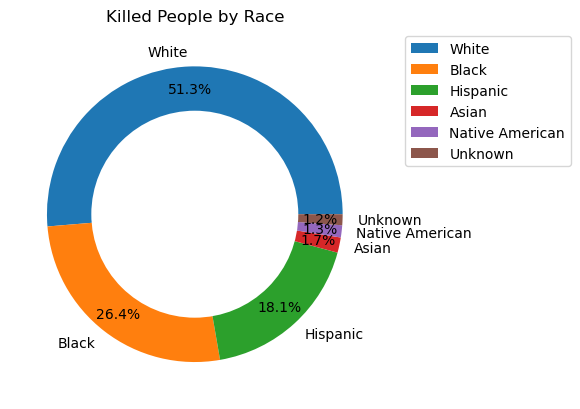

In [20]:
# Pie Chart
plt.pie(data=killed_by_race, x="id", labels='race', autopct='%1.1f%%', pctdistance=0.85) 
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Killed People by Race')
 
# Add Legends
plt.legend(killed_by_race['race'], loc="upper right")
plt.legend(bbox_to_anchor=(1.05,1))

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [21]:
killed_by_gender = df_fatalities.groupby('gender', as_index=False, observed=True)['id'].count()
killed_by_gender.sort_values(by='id', ascending=False, inplace=True)

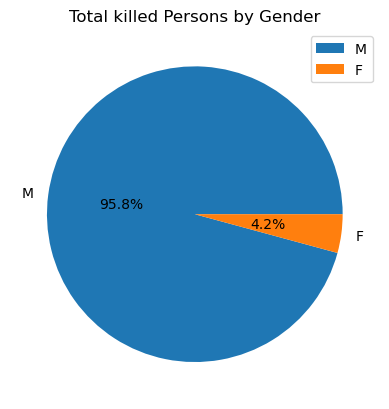

In [22]:
plt.pie(data=killed_by_gender, x="id", labels='gender', autopct='%1.1f%%', pctdistance=0.5)
plt.title('Total killed Persons by Gender')
plt.legend()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

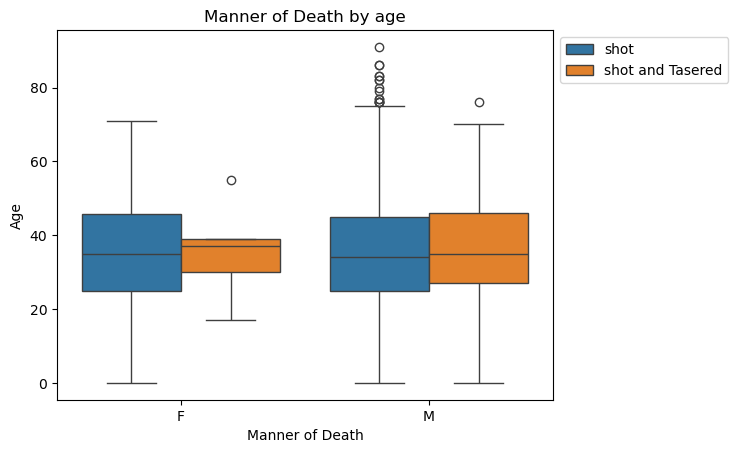

In [23]:
sns.boxplot(df_fatalities, 
            x='gender', 
            y='age', 
            hue='manner_of_death')
plt.title('Manner of Death by age')
plt.ylabel('Age')
plt.xlabel('Manner of Death')
plt.legend(bbox_to_anchor=(1.,1))
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

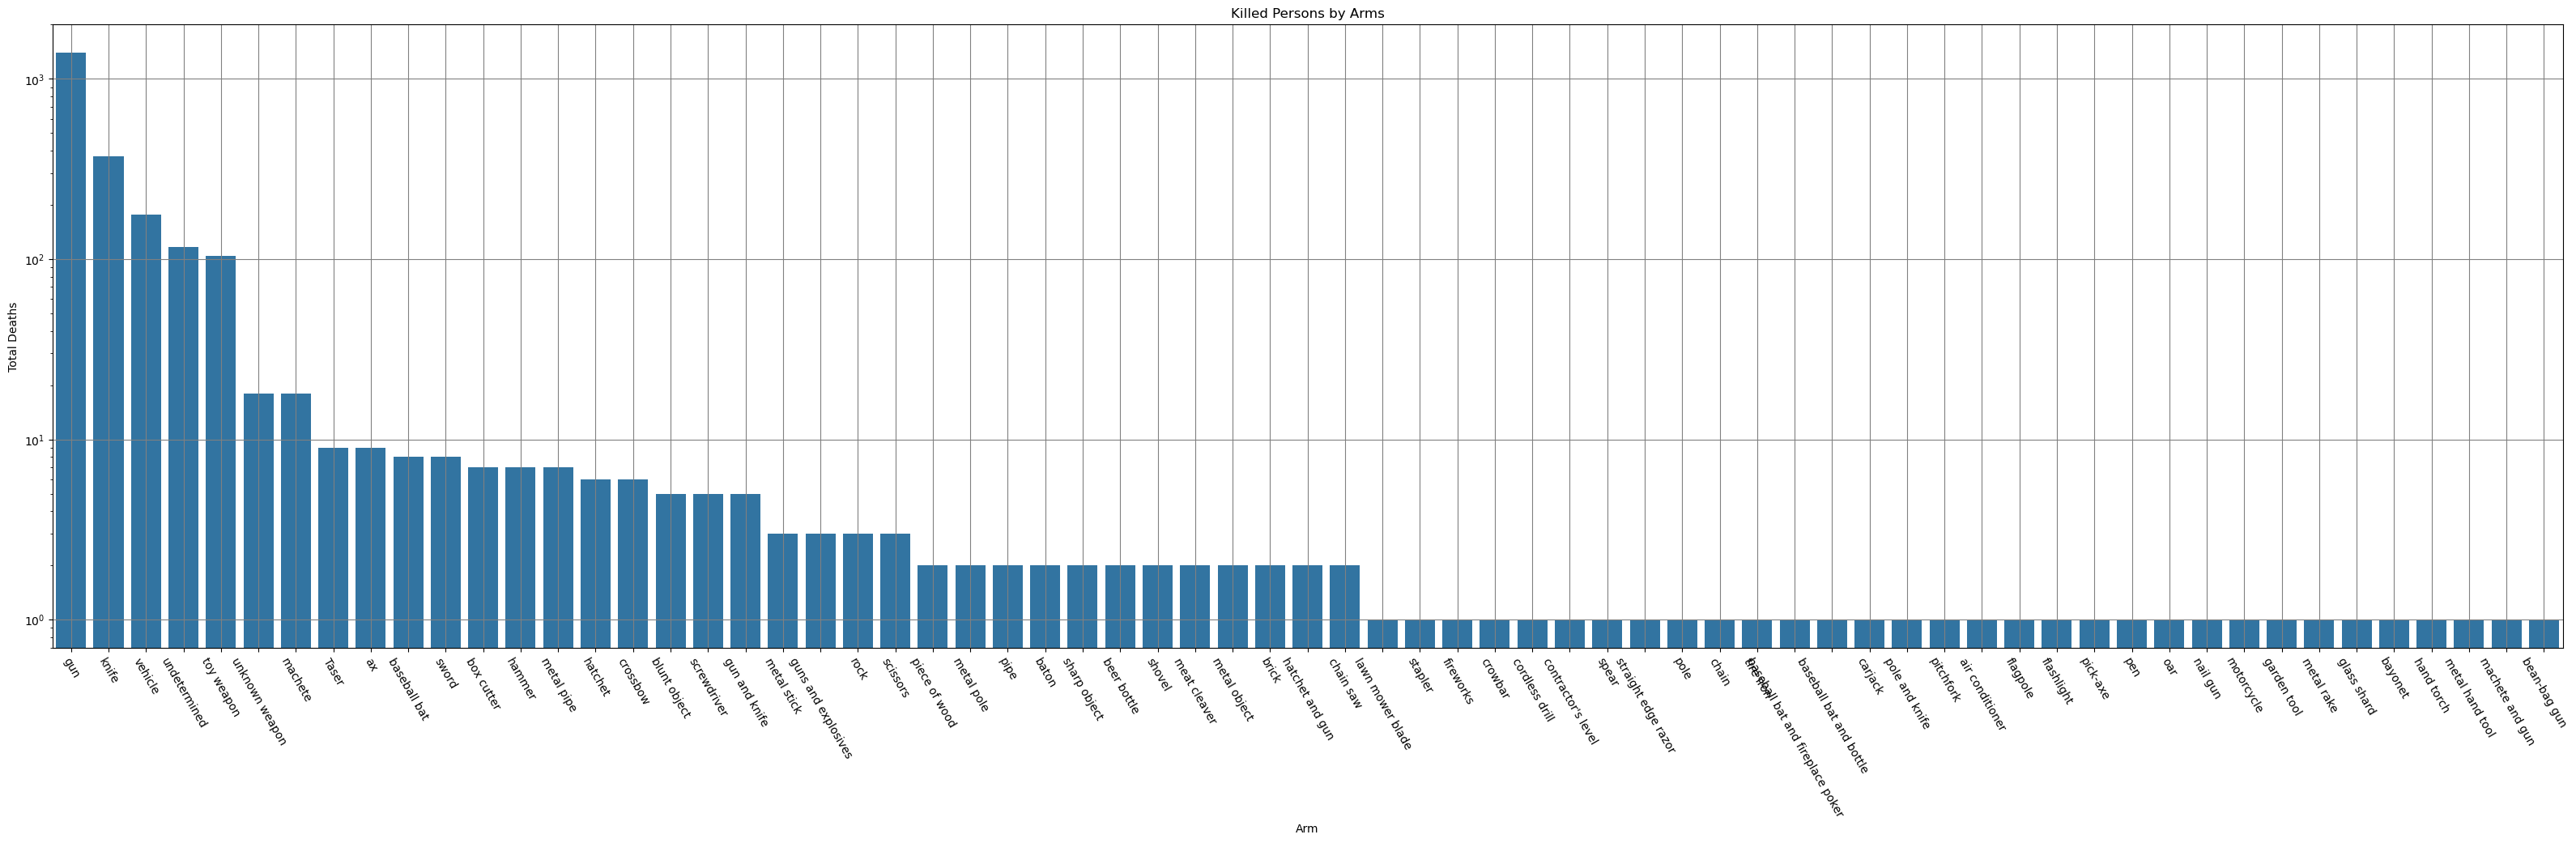

In [24]:
killed_by_armed = df_fatalities.groupby('armed', as_index=False, observed=True).agg(count = ('id','count')).sort_values(by='count', ascending=False)
killed_by_armed.reset_index(inplace=True, drop=True)

drop = killed_by_armed['armed'] == 'unarmed'
killed_armed_only = killed_by_armed[~drop]


plt.figure(figsize=(40, 10))
plt.title('Killed Persons by Arms')
sns.barplot(
  data=killed_armed_only,
  x='armed', 
  y='count',
  order=killed_armed_only['armed'],
  log=True)

plt.grid(color='grey')
# plt.ylim(75, 95)
plt.ylabel('Total Deaths')
plt.xlabel('Arm')
plt.xticks(rotation=-60)
plt.show()

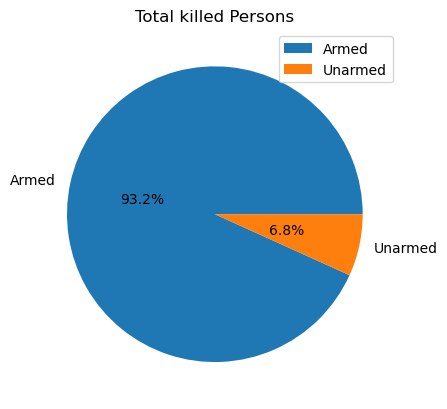

In [25]:
total_armed = killed_armed_only['count'].sum()
total_unarmed = killed_by_armed[drop]['count'].sum()

plt.pie(x=[total_armed, total_unarmed], labels=['Armed', 'Unarmed'], autopct='%1.1f%%', pctdistance=0.5)
plt.title('Total killed Persons')
plt.legend()
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

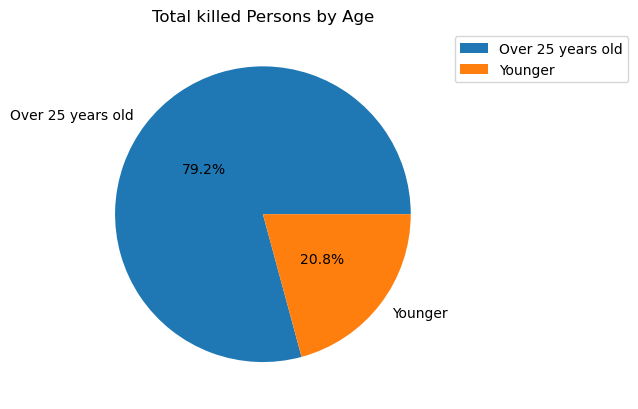

In [26]:
older = df_fatalities[df_fatalities['age'].ge(25)].count()['age']
younger = df_fatalities['age'].count() - older

plt.pie(x=[older, younger], labels=['Over 25 years old', 'Younger'], autopct='%1.1f%%', pctdistance=0.5)
plt.title('Total killed Persons by Age')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

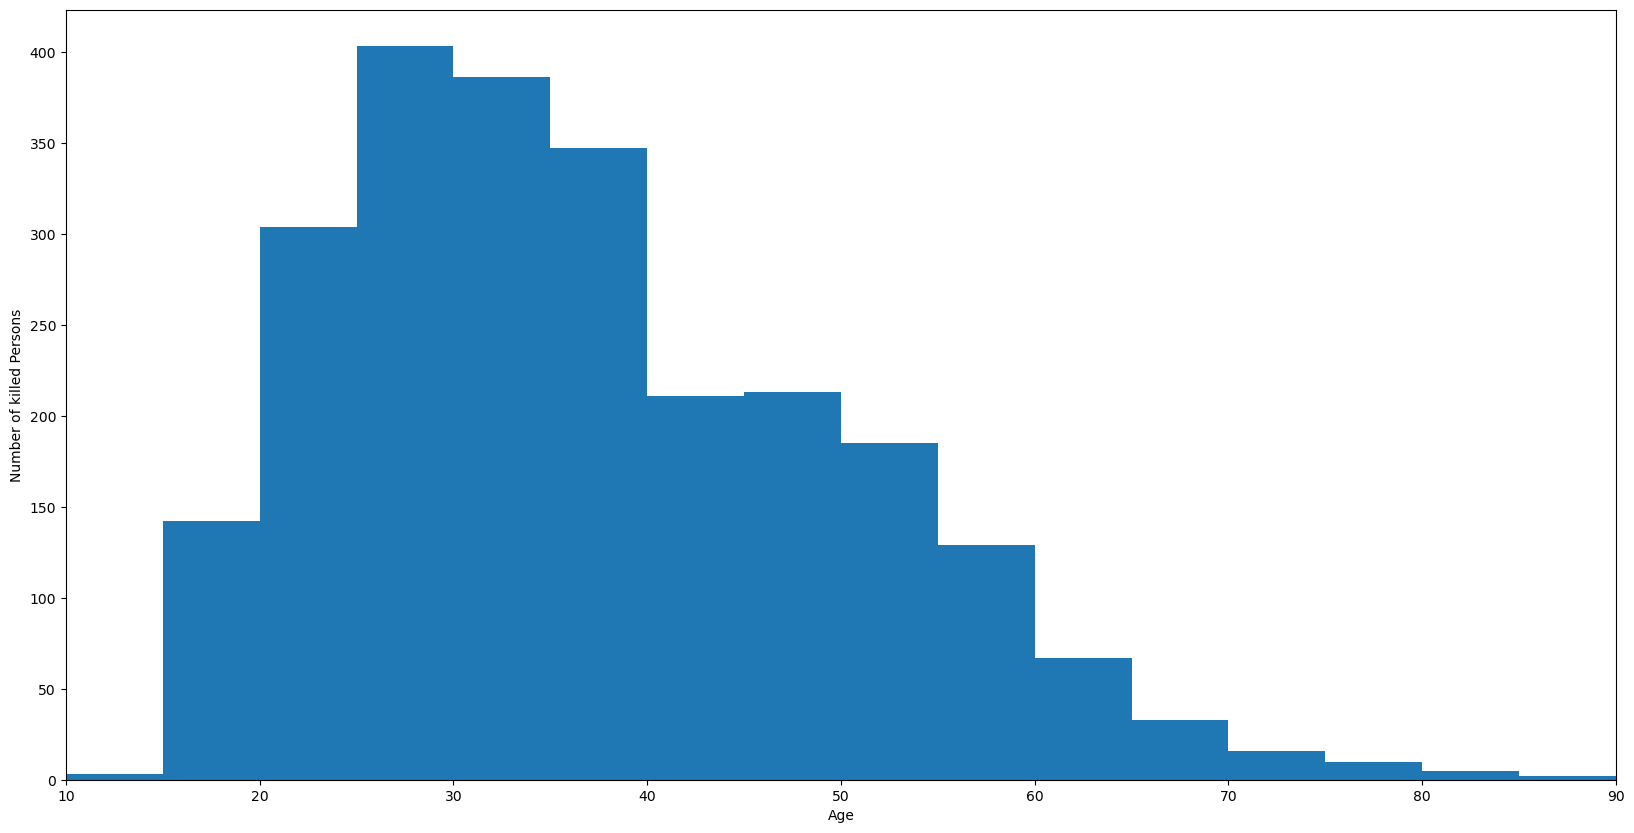

In [27]:
plt.figure(figsize=(20,10))
plt.hist(df_fatalities['age'], bins=np.arange(0, 100, 5))
plt.ylabel("Number of killed Persons")
plt.xlabel('Age')
plt.xlim(10, 90)
plt.show()

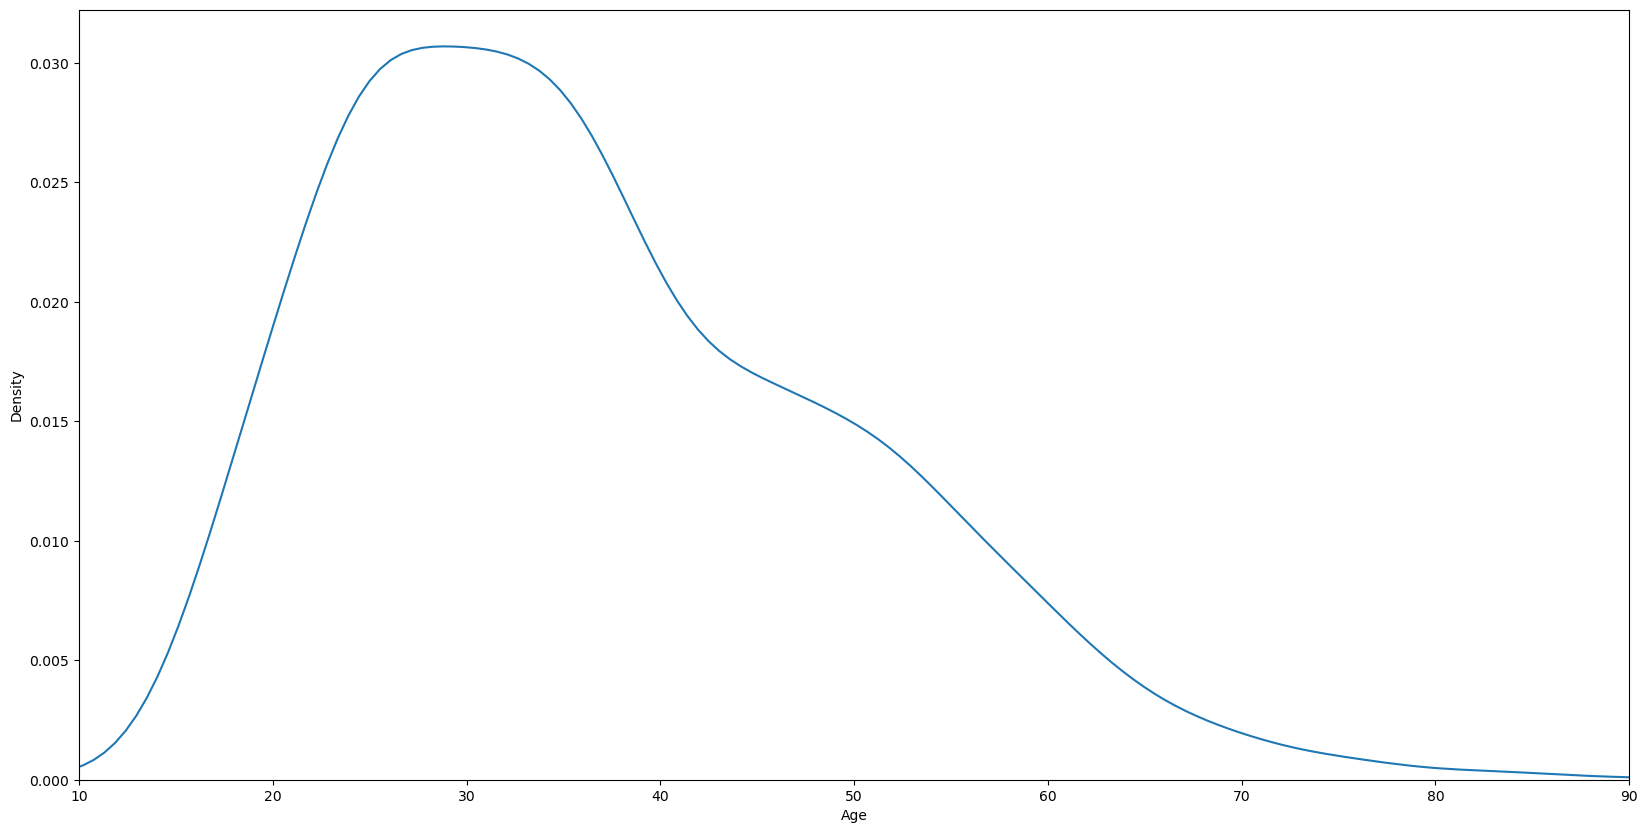

In [28]:
plt.figure(figsize=(20,10))
sns.kdeplot(df_fatalities['age'])
plt.ylabel("Density")
plt.xlabel('Age')
plt.xlim(10, 90)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

C:\Users\eric-\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 640x480 with 0 Axes>

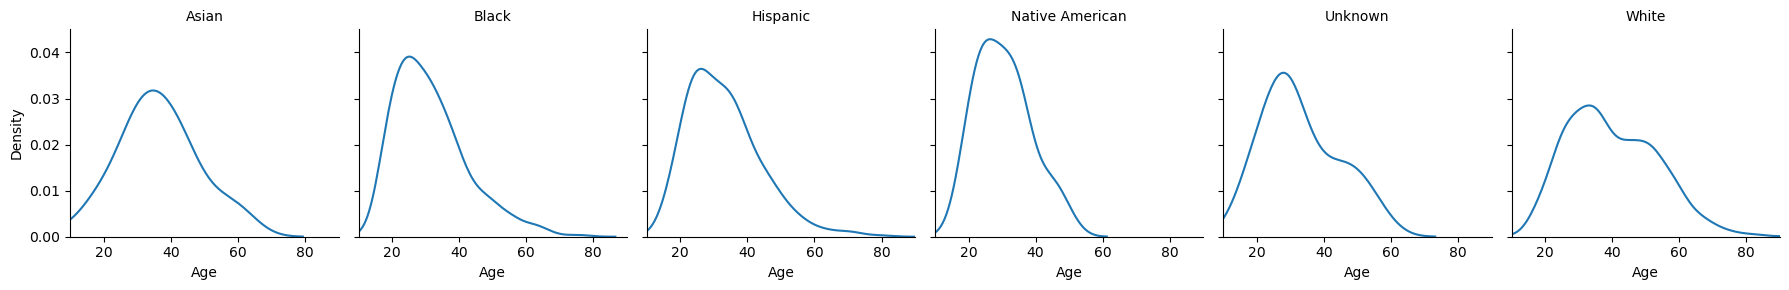

In [29]:
plt.figure()
g = sns.FacetGrid(data=df_fatalities, col='race')
g = g.map_dataframe(sns.kdeplot, 'age')
g = g.set_axis_labels('Age', 'Density')
g = g.set_titles('{col_name}')
g = g.set(xlim=(10, 90))
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

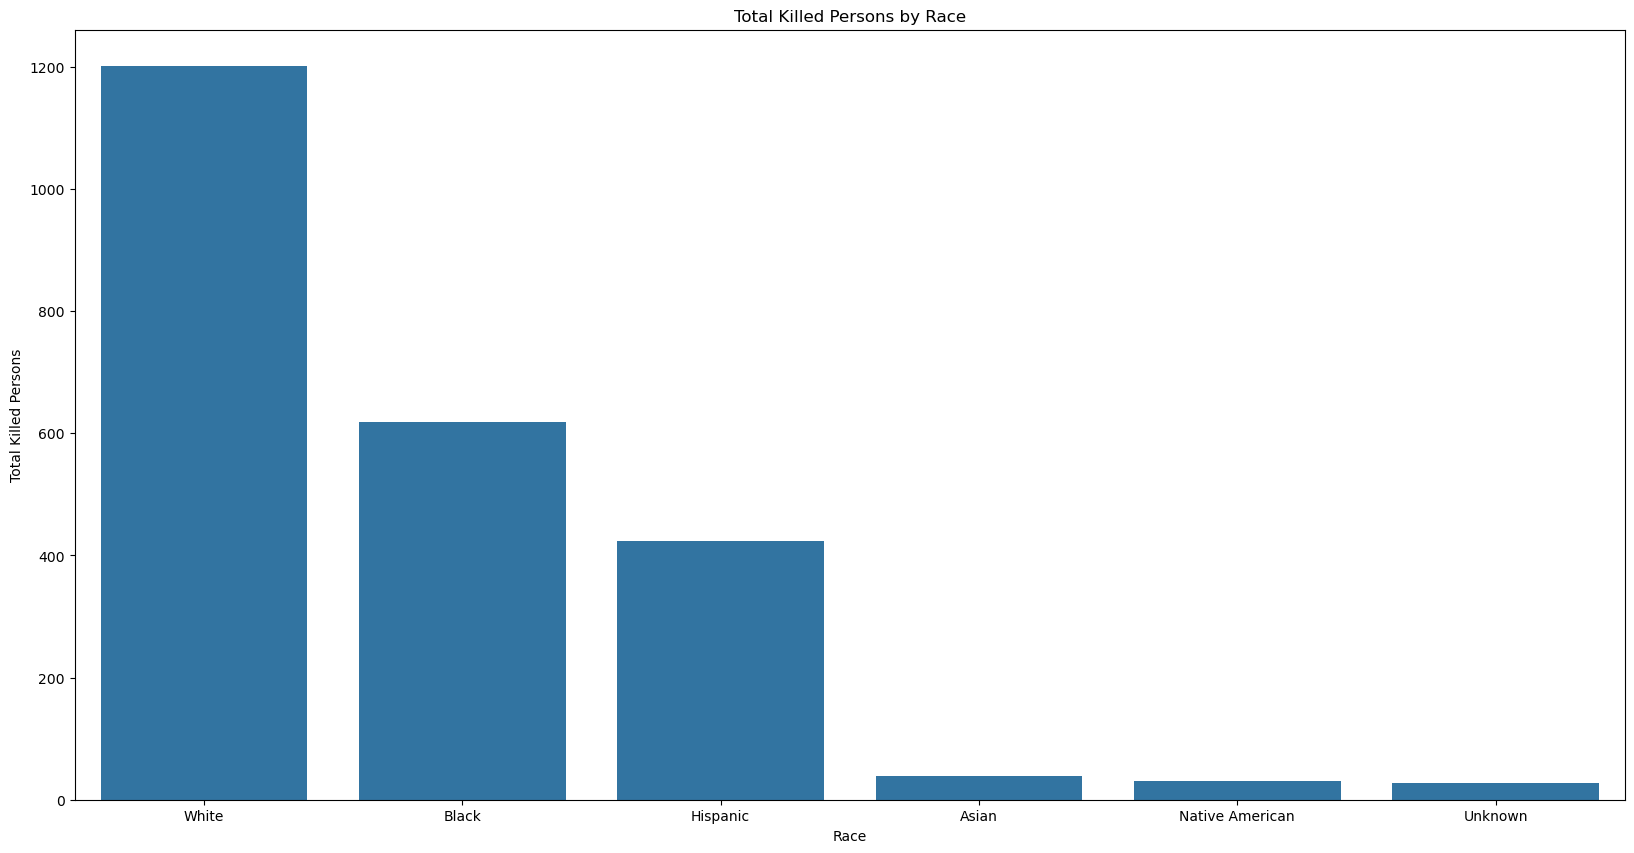

In [30]:
plt.figure(figsize=(20, 10))
plt.title('Total Killed Persons by Race')
sns.barplot(
  data=killed_by_race,
  x='race', 
  y='id',
  order=killed_by_race['race']
)

# plt.ylim(75, 95)
plt.ylabel('Total Killed Persons')
plt.xlabel('Race')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [31]:
killed_mental = df_fatalities.groupby('signs_of_mental_illness', observed=False, as_index=False)['signs_of_mental_illness'].count()

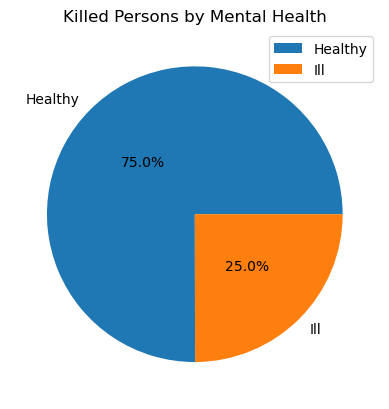

In [32]:
plt.pie(killed_mental['signs_of_mental_illness'], labels=['Healthy', 'Ill'], autopct='%1.1f%%', pctdistance=0.5)
plt.title('Killed Persons by Mental Health')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [33]:
killed_by_city = df_fatalities.groupby('city', observed=False, as_index=False)['id'].count()
killed_by_city = killed_by_city.sort_values(by='id', ascending=False).reset_index(drop=True)[:10]
killed_by_city = killed_by_city.rename(columns={'id':'killed'})
top_cities = killed_by_city['city'].to_list()

killed_city_race = pd.merge(df_fatalities, killed_by_city, on='city')
killed_city_race = killed_city_race.groupby(['city', 'race'], observed=False, as_index=False)['id'].count()
killed_city_race = killed_city_race.rename(columns={'id':'killed'})

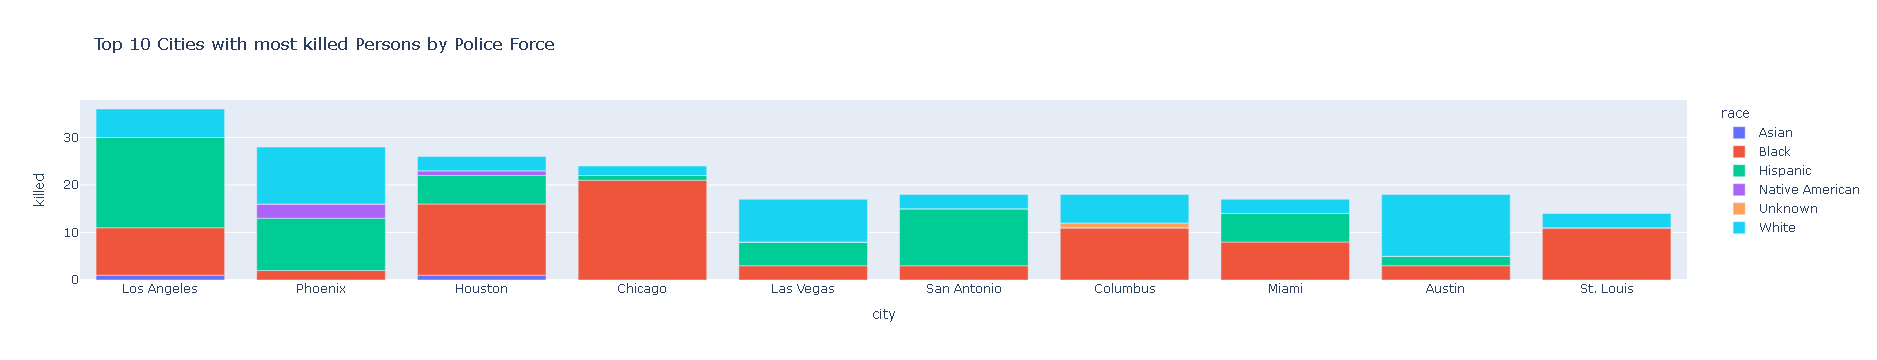

In [34]:
fig = px.bar(killed_city_race, 
             x='city', 
             y='killed', 
             color='race', 
             title="Top 10 Cities with most killed Persons by Police Force",
             category_orders={'city':top_cities, 'killed':['White', 'Black', 'Asian', 'Hispanic', 'Native American', 'Unknown']})

fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [41]:
# Group by State and City to find the exact same city in df_share_race_city
killed_by_state_city = df_fatalities.groupby(['state', 'city'], observed=False, as_index=False)['id'].count()
killed_by_state_city = killed_by_state_city.sort_values(by='id', ascending=False).reset_index(drop=True)[:10]
killed_by_state_city = killed_by_state_city.rename(columns={'city':'City','id':'killed'})

# Convert and trim city names to make them comparable
df_city_data['City'] = df_city_data['City'].str.replace('CDP', '').str.replace('city', '').str.replace('town', '').str.strip()

# Merge both dataframes
killed_race_merged = pd.merge(killed_by_state_city, df_city_data, on=['state','City'])

killed_race_merged_reduced = killed_race_merged.drop(columns=['state', 'poverty_rate', 'percent_completed_hs', 'Median_Income'])
killed_city_race_wide = killed_city_race.pivot(index='city', columns='race', values='killed')
killed_city_race_wide = killed_city_race_wide.reset_index().rename_axis(None, axis=1)
killed_race_rate = pd.merge(killed_city_race_wide, killed_race_merged_reduced, left_on='city', right_on='City')
killed_race_rate = killed_race_rate.drop(columns='City').sort_values(by='killed', ascending=False)

# Calculate Rate at wich people are killed by race
# killed_race_rate['Asian Death Rate'] = killed_race_rate['Asian'] / killed_race_rate['killed'] * killed_race_rate['share_asian']
# killed_race_rate['Black Death Rate'] = killed_race_rate['Black'] / killed_race_rate['killed'] * killed_race_rate['share_black']
# killed_race_rate['Hispanic Death Rate'] = killed_race_rate['Hispanic'] / killed_race_rate['killed'] * killed_race_rate['share_hispanic']
# killed_race_rate['White Death Rate'] = killed_race_rate['White'] / killed_race_rate['killed'] * killed_race_rate['share_white']
# killed_race_rate['Native American Death Rate'] = killed_race_rate['Native American'] / killed_race_rate['killed'] * killed_race_rate['share_native_american']
killed_race_rate['Asian Death Rate'] = killed_race_rate['Asian'] / killed_race_rate['killed']
killed_race_rate['Black Death Rate'] = killed_race_rate['Black'] / killed_race_rate['killed']
killed_race_rate['Hispanic Death Rate'] = killed_race_rate['Hispanic'] / killed_race_rate['killed']
killed_race_rate['White Death Rate'] = killed_race_rate['White'] / killed_race_rate['killed']
killed_race_rate['Native American Death Rate'] = killed_race_rate['Native American'] / killed_race_rate['killed']
keep = ['city', 'state_long', 'Asian Death Rate', 'Black Death Rate', 'Hispanic Death Rate', 'White Death Rate', 'Native American Death Rate']
killed_race_rate_df = killed_race_rate[keep]
killed_race_rate_df

city  state_long  Asian Death Rate  Black Death Rate  \
5  Los Angeles  California              0.03              0.26   
7      Phoenix     Arizona              0.00              0.06   
3      Houston       Texas              0.04              0.58   
1      Chicago    Illinois              0.00              0.84   
4    Las Vegas      Nevada              0.00              0.14   
8  San Antonio       Texas              0.00              0.15   
2     Columbus        Ohio              0.00              0.65   
6        Miami     Florida              0.00              0.47   
0       Austin       Texas              0.00              0.19   
9    St. Louis    Missouri              0.00              0.73   

   Hispanic Death Rate  White Death Rate  Native American Death Rate  
5                 0.49              0.15                        0.00  
7                 0.35              0.39                        0.10  
3                 0.23              0.12                        0.04  
1                 0.04              0.08                        0.00  
4                 0.24              0.43                        0.00  
8                 0.60              0.15                        0.00  
2                 0.00              0.35                        0.00  
6                 0.35              0.18                        0.00  
0                 0.12              0.81                        0.00  
9                 0.00              0.20                        0.00

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

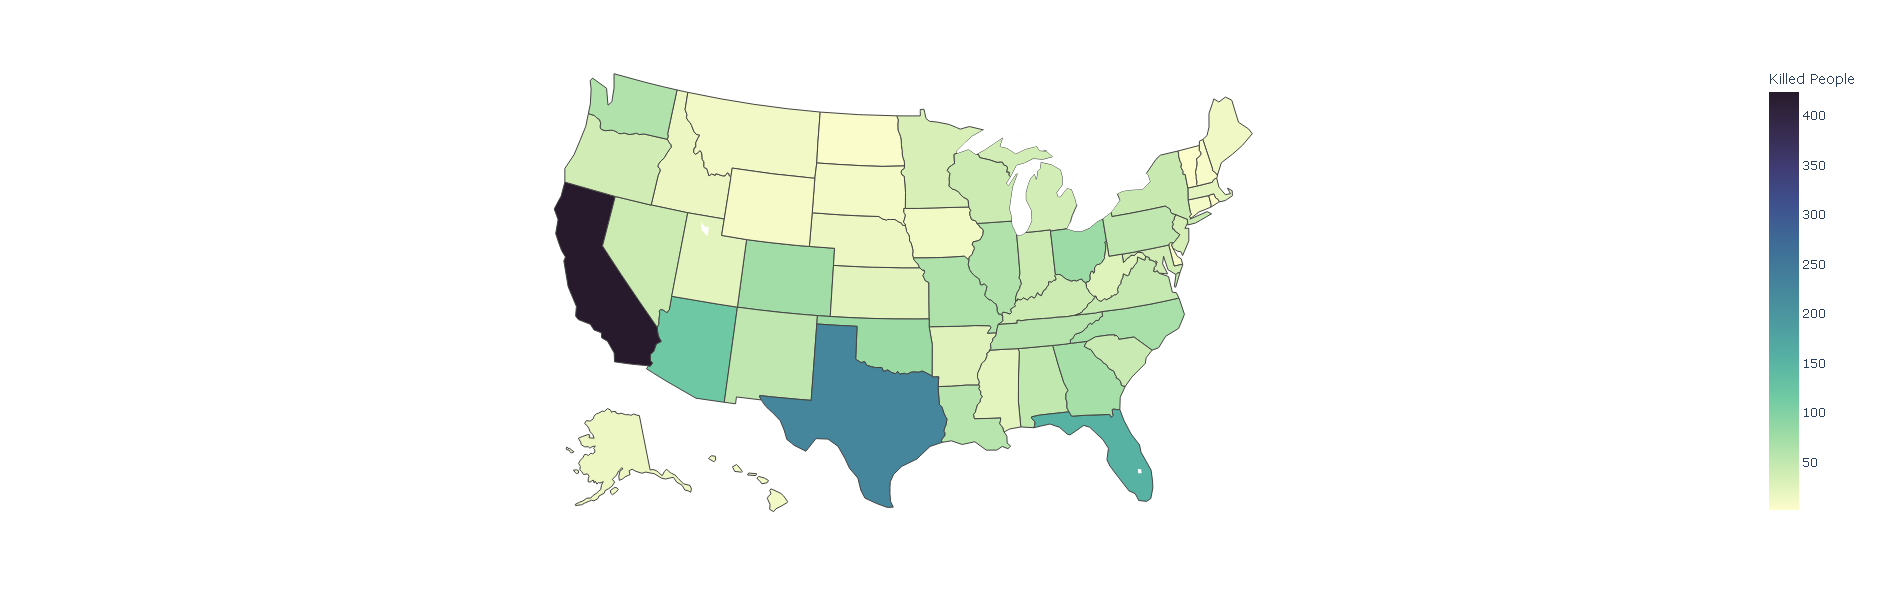

In [36]:
killed_by_state_city_all = df_fatalities.groupby(['state', 'city'], observed=False, as_index=False)['id'].count()
killed_by_state_city_all = killed_by_state_city_all.sort_values(by='id', ascending=False).reset_index(drop=True)
killed_by_state_city_all = killed_by_state_city_all.rename(columns={'id':'Killed People'})
killed_by_state_city_all = killed_by_state_city_all.groupby('state', observed=False, as_index=False)['Killed People'].sum()

world_map = px.choropleth(killed_by_state_city_all,
                          locations='state',
                          locationmode="USA-states",
                          scope="usa",
                          color='Killed People', 
                          color_continuous_scale=px.colors.sequential.deep,
                          height=600)

 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [111]:
df_fatalities_trend = df_fatalities.groupby('date', observed=False, as_index=False)['id'].count()
df_fatalities_trend = df_fatalities_trend.rename(columns={'id':'Killed People'})
df_fatalities_trend = df_fatalities_trend.sort_values(by='date')
df_fatalities_trend.set_index('date', inplace=True)
df_fatalities_trend.index = pd.to_datetime(df_fatalities_trend.index)
df_fatalities_trend = df_fatalities_trend.resample('ME').sum()

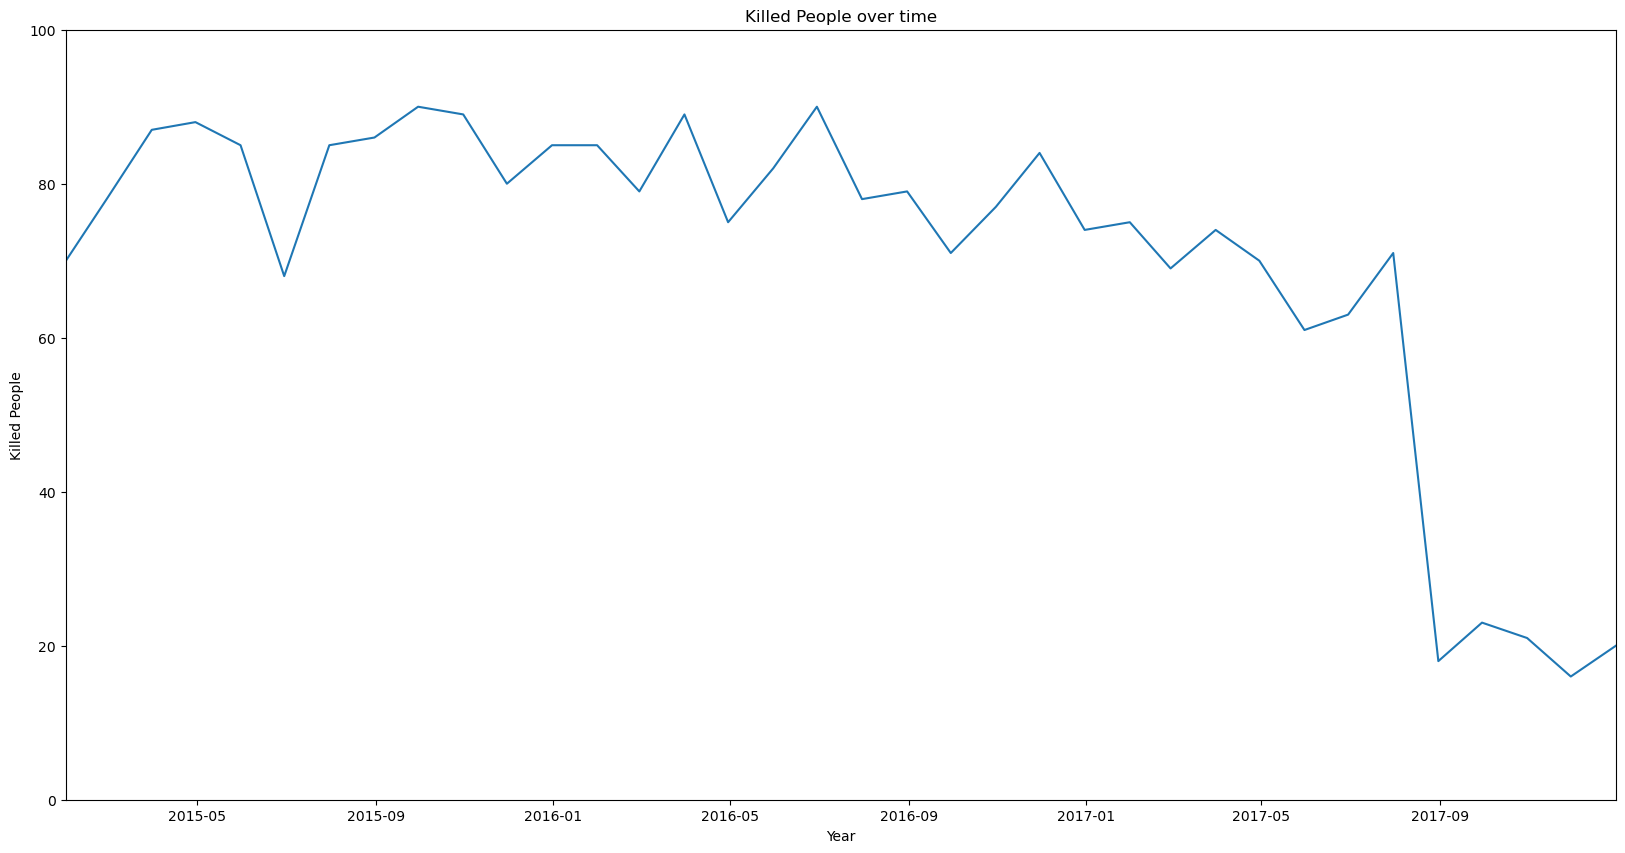

In [125]:
from datetime import datetime

plt.subplots(figsize=(20, 10))
plt.title('Killed People over time')
sns.lineplot(
  data=df_fatalities_trend,
  x='date', 
  y='Killed People'
)

plt.ylabel('Killed People')
plt.xlabel('Year')
plt.xlim(datetime.strptime('2015-01-31', '%Y-%m-%d'), datetime.strptime('2017-12-31', '%Y-%m-%d'))
plt.ylim(0, 100)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).